In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/cardekho_imputated.csv')

In [ ]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
df.shape

(15411, 14)

**Checking Null values**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


**Handling Duplicates**

In [ ]:
df.duplicated().sum()

0

**Feature Engineering**

In [ ]:
df.loc[df['brand']=='Ferrari']

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3799,4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


**Car_Name column can be dropped as it already split into brand and model. **

In [ ]:
df.drop('car_name',inplace = True,axis = 1)
df.drop('Unnamed: 0',axis = 1,inplace= True)

**Types of Features**

In [ ]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numeric features : {}'.format(len(num_features),num_features))

We have 7 numeric features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} categorical features : {}'.format(len(cat_features),cat_features))

We have 5 categorical features : ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('We have {} discrete features : {}'.format(len(discrete_features),discrete_features))

We have 2 discrete features : ['vehicle_age', 'seats']


In [ ]:
continuous_features =[feature for feature in num_features if feature not in discrete_features]
print('We have {} continuous features : {}'.format(len(continuous_features),continuous_features))

We have 5 continuous features : ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


**Multicollinearity Check**

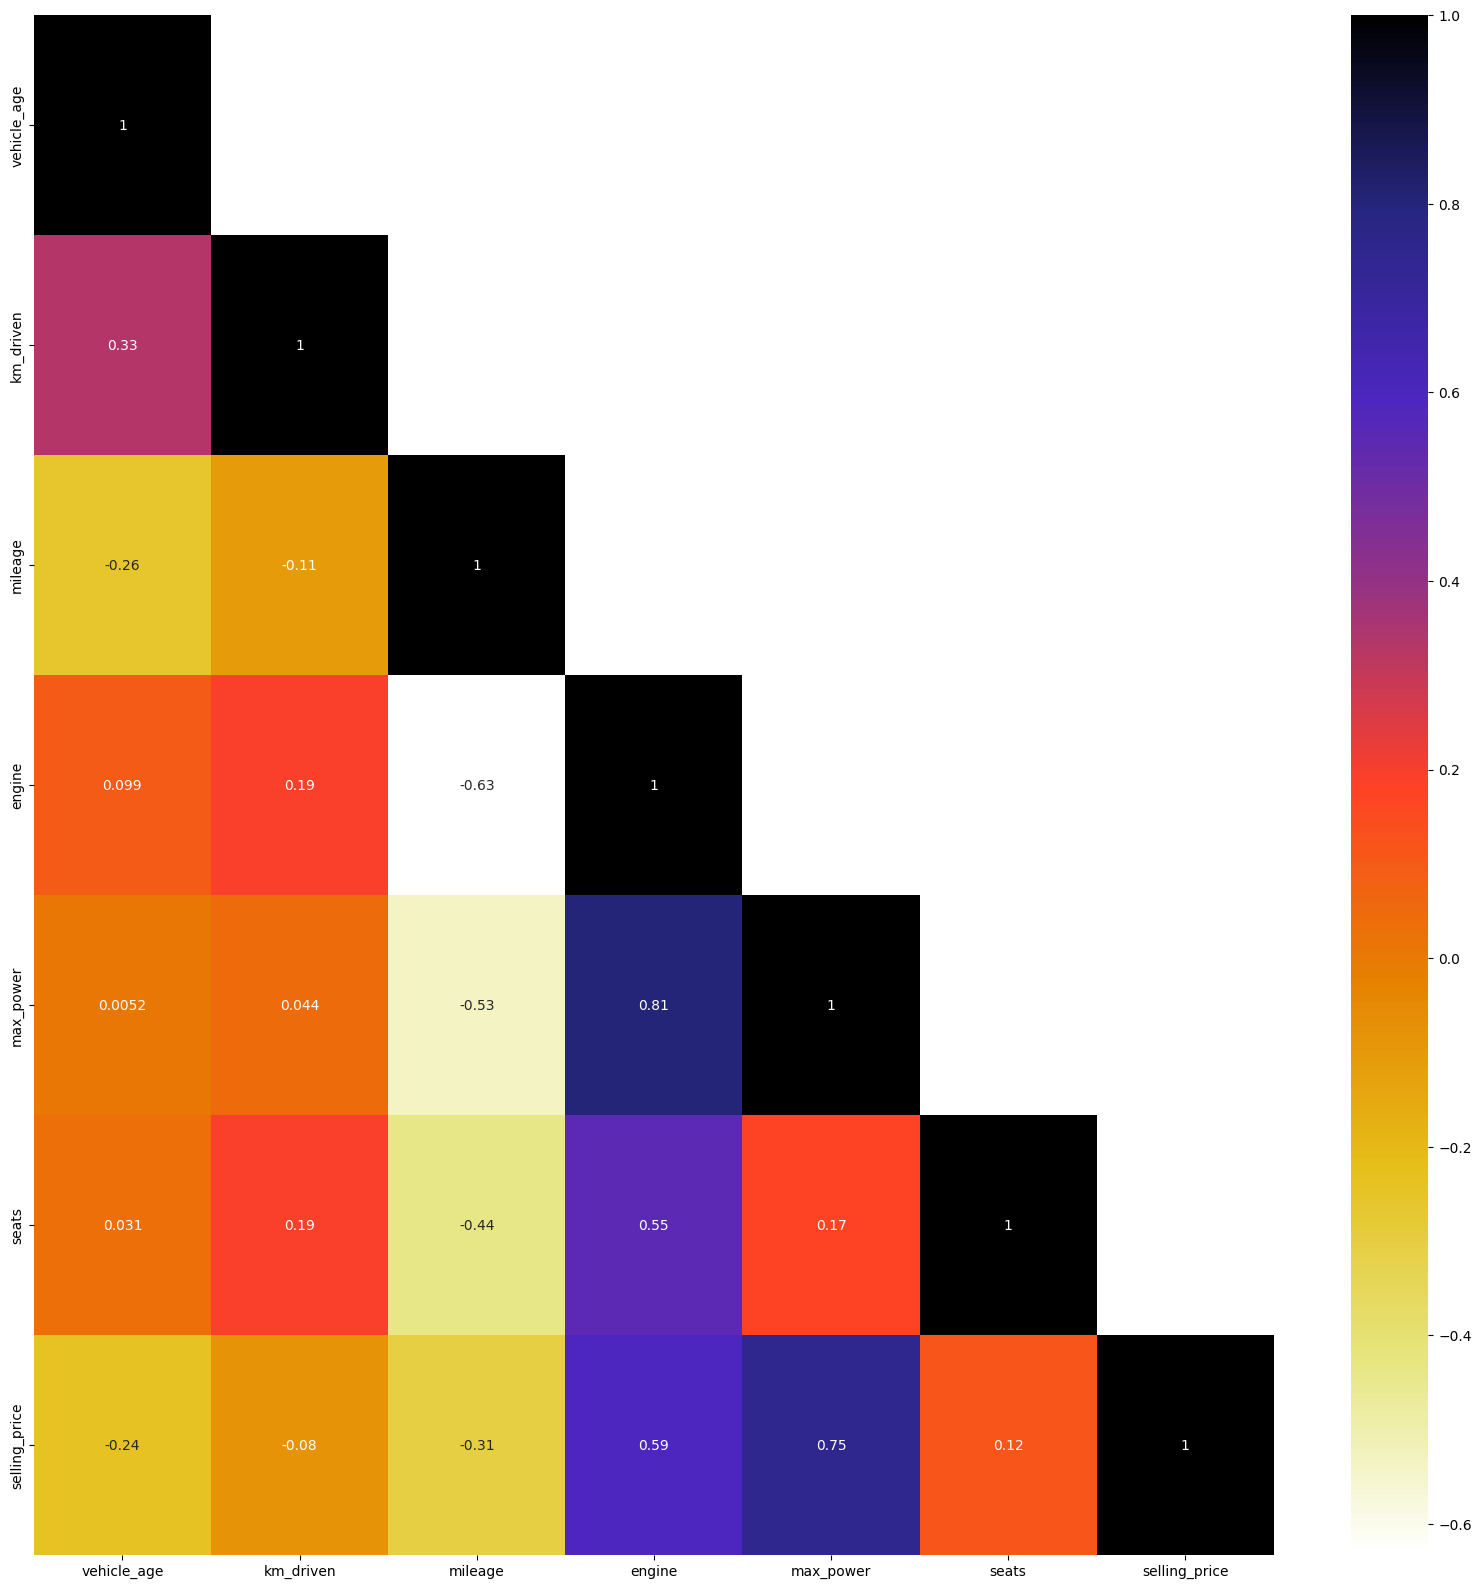

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only= True),cmap = 'CMRmap_r',annot = True,mask = np.triu(df.corr(numeric_only=True),k = 1))
plt.show()

Report:
* Max_power and Engine are highly correlated.
* We can check vif to remove any high correlated independent features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(df,considered_features):
  X = df[considered_features]
  X['intercept'] = 1
  vif = pd.DataFrame()
  vif['variable'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  vif =vif[vif['variable']!= 'intercept']
  return vif

In [ ]:
compute_vif(df,num_features)

,variable,VIF
0,vehicle_age,1.406352
1,km_driven,1.212640
2,mileage,1.945103
3,engine,6.244006
4,max_power,5.952622
5,seats,2.245733
6,selling_price,2.680638


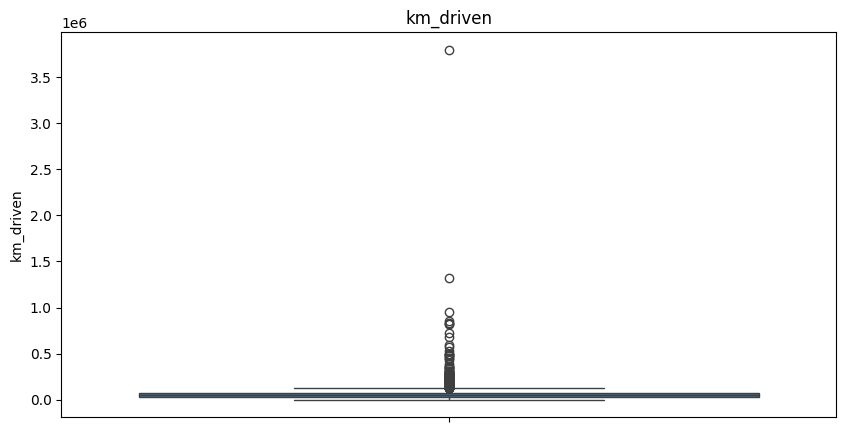

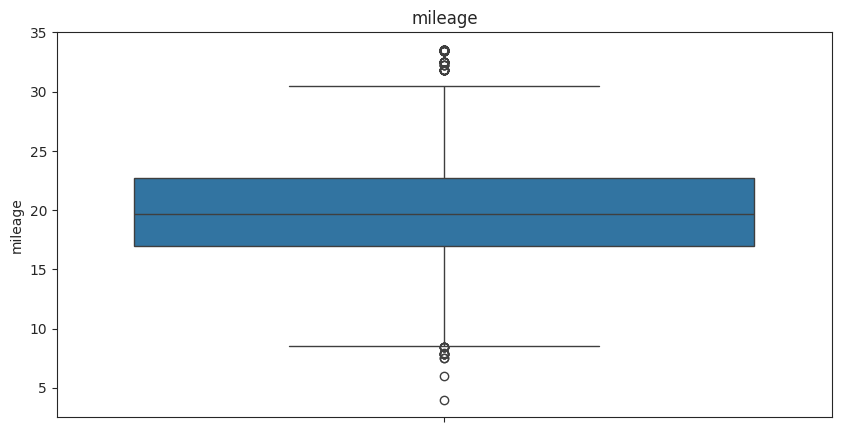

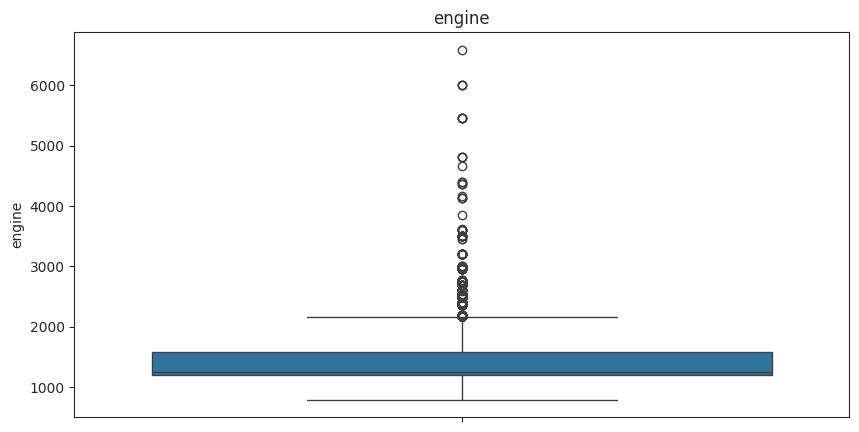

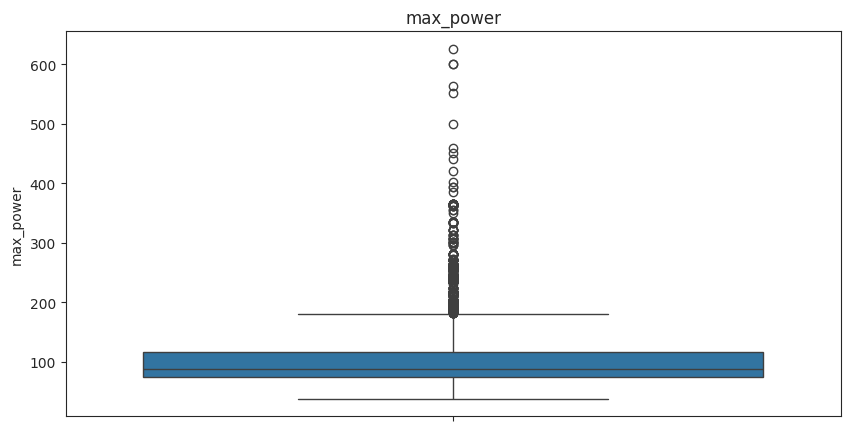

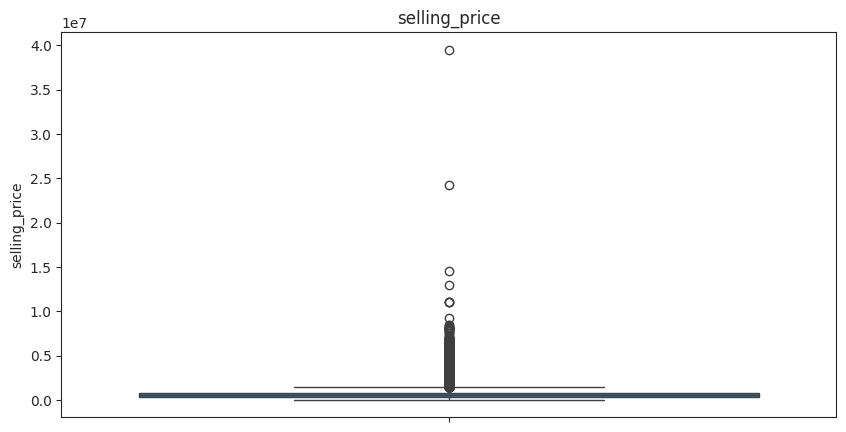

In [ ]:
for i in continuous_features:
  plt.figure(figsize = (10,5))
  plt.title(str(i))
  sns.set_style('ticks')
  ax = sns.boxplot(df[i])
  plt.show()

In [ ]:
def detect_outliers(col):
  # Finding the outlier
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  print('\n ####',col,'####')
  print('percentile25',percentile25)
  print('percentile75',percentile75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  print('Upper limit',upper_limit)
  print('Lower limit',lower_limit)
  df.loc[(df[col]>upper_limit),col] = upper_limit
  df.loc[(df[col]<lower_limit),col] = lower_limit
  return df

In [ ]:
for i in continuous_features:
  detect_outliers(i)


 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


**After capping the outliers**

In [ ]:
df[continuous_features].skew(axis=0,skipna=True)

,0
km_driven,0.617437
mileage,0.067940
engine,0.684096
max_power,1.067229
selling_price,0.968836


In [ ]:
df.columns

Index(['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

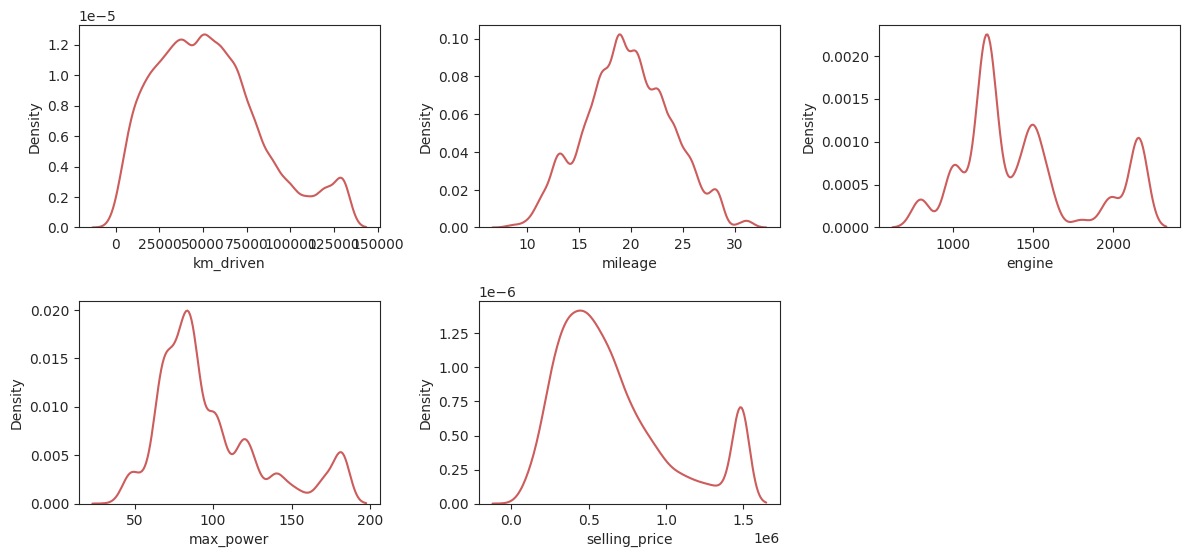

In [ ]:
#distribution of data before scaling
plt.figure(figsize = (12,8))
for i,col in enumerate(['km_driven','mileage','engine','max_power','selling_price']):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x = df[col],color ='indianred')
    plt.xlabel(col)
    plt.tight_layout()

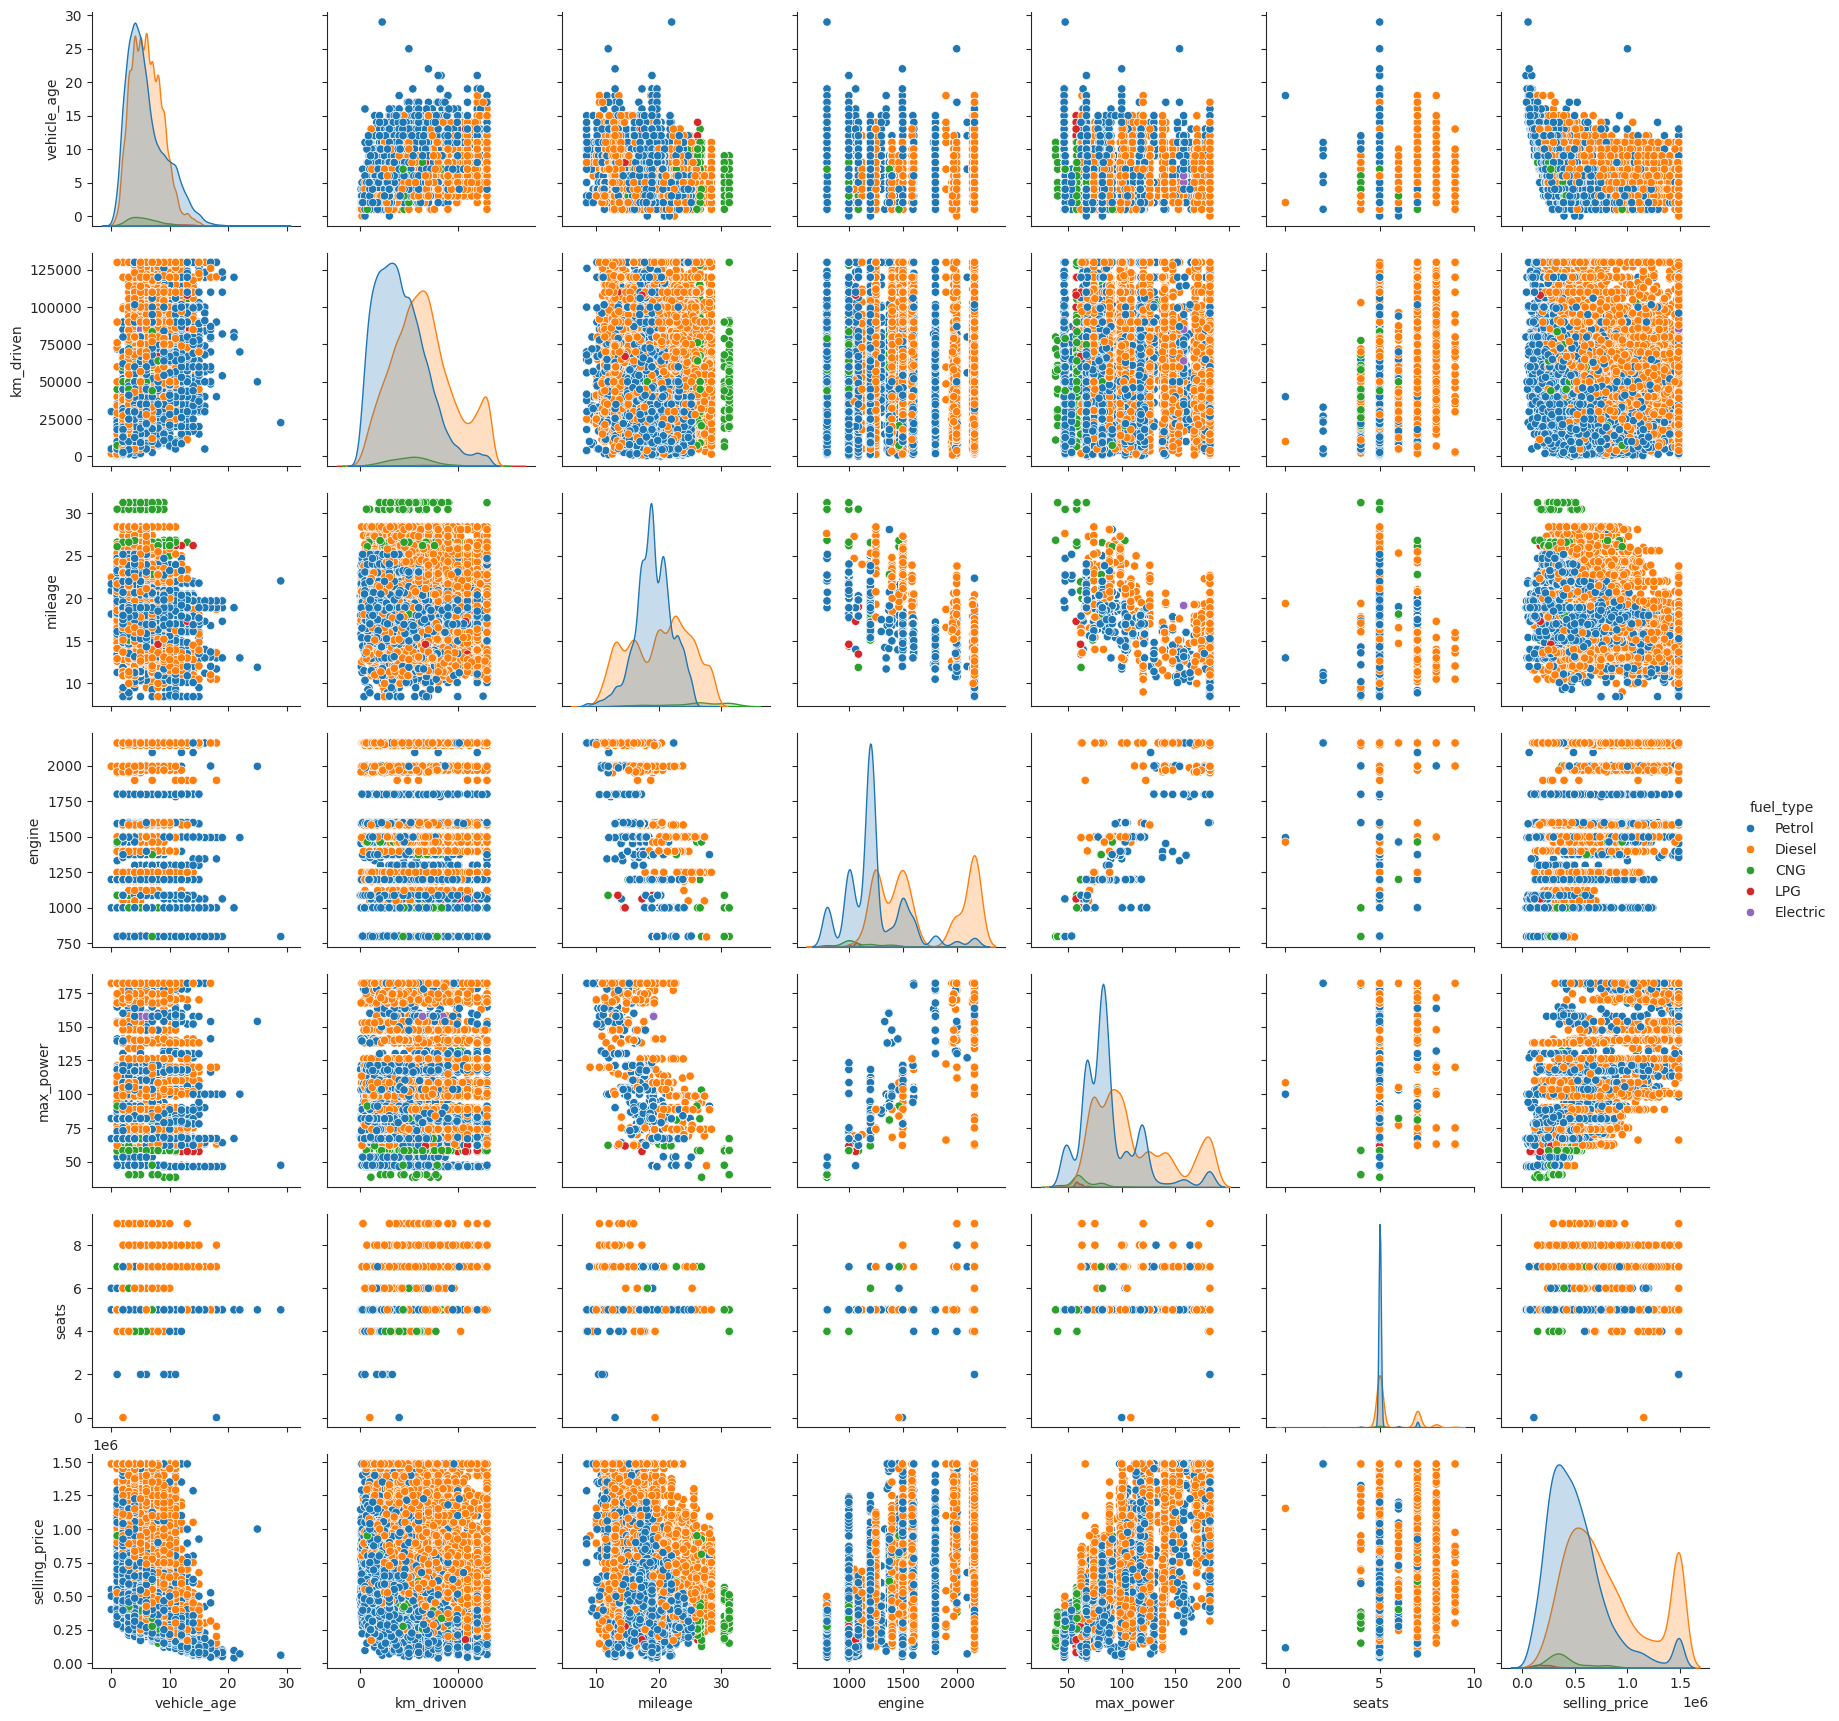

In [ ]:
sns.pairplot(data=df,hue='fuel_type')

In [ ]:
cat_features

['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [ ]:
dataframe  = df.copy()

In [ ]:
dataframe.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


In [ ]:
#converting the category column into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
dataframe['brand']= le1.fit_transform(dataframe['brand'])
le2 = LabelEncoder()
dataframe['model']= le2.fit_transform(dataframe['model'])
le3 = LabelEncoder()
dataframe['seller_type']= le3.fit_transform(dataframe['seller_type'])
le4 = LabelEncoder()
dataframe['fuel_type']= le4.fit_transform(dataframe['fuel_type'])
le5 = LabelEncoder()
dataframe['transmission_type']= le5.fit_transform(dataframe['transmission_type'])

In [ ]:
import pickle
pickle.dump(le1, open('label_encoder1brand.pkl', 'wb'))
pickle.dump(le2, open('label_encoder2model.pkl', 'wb'))
pickle.dump(le3, open('label_encoder3seller_type.pkl', 'wb'))
pickle.dump(le4, open('label_encoder4fuel_type.pkl', 'wb'))
pickle.dump(le5, open('label_encoder5transmission_type.pkl', 'wb'))

In [ ]:
category_to_check = 'Audi'
le = le1
#Transform the chosen category to its encoded value
encoded_value = le.transform([category_to_check])[0]

print(f"The encoded value for '{category_to_check}' is: {encoded_value}")

The encoded value for 'Audi' is: 0


**Split x and y**

**Feature Selection**

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns (assuming you know which ones are categorical)
categorical_columns = ['brand','model','seller_type','fuel_type','transmission_type']

# Dictionary to store unique values
unique_values = {}

# Get unique values for each categorical column
for col in categorical_columns:
    unique_values[col] = df[col].unique().tolist()

# Save unique values
with open('unique_values.pkl', 'wb') as f:
    pickle.dump(unique_values, f)

# Preprocess data (example using LabelEncoder)
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Train your model (example)
# model = ...
# model.fit(X, y)

# Save your model
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# Later, when predicting:
# with open('unique_values.pkl', 'rb') as f:
#     unique_values = pickle.load(f)
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)

# Ensure new data only contains values seen during training
# for col in categorical_columns:
#     new_data[col] = new_data[col].map(lambda x: x if x in unique_values[col] else 'Unknown')

In [ ]:
from sklearn.model_selection import train_test_split
x = dataframe.drop(['selling_price'],axis = 1)
y = dataframe['selling_price']

In [ ]:
from scipy import stats

def analyze_categorical_variables(df):
    results = {}
    for column in df.select_dtypes(include=['object', 'category']):
        unique_values = df[column].nunique()
        value_counts = df[column].value_counts()

        # Check if values can be converted to numeric
        try:
            numeric_values = pd.to_numeric(df[column], errors='coerce')
            is_numeric = not numeric_values.isna().all()
        except:
            is_numeric = False

        # Check for potential ordinal nature
        if is_numeric:
            correlation = stats.spearmanr(numeric_values, df.index)[0]
            potential_ordinal = abs(correlation) > 0.5
        else:
            potential_ordinal = False

        results[column] = {
            'unique_values': unique_values,
            'top_20_values': value_counts.head().to_dict(),
            'is_numeric': is_numeric,
            'potential_ordinal': potential_ordinal
        }

    return results

In [ ]:
x

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,18,7,9,120000,1,4,1,19.70,796.0,46.30,5
1,8,54,5,20000,1,4,1,18.90,1197.0,82.00,5
2,8,118,11,60000,1,4,1,17.00,1197.0,80.00,5
3,18,7,9,37000,1,4,1,20.92,998.0,67.10,5
4,6,38,6,30000,0,1,1,22.77,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...
15406,8,117,9,10723,0,4,1,19.81,1086.0,68.05,5
15407,18,42,2,18000,0,4,1,17.50,1373.0,91.10,7
15408,27,77,6,67000,0,1,1,21.14,1498.0,103.52,5
15409,17,114,5,130000,0,1,1,16.00,2159.5,140.00,7


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 0.34333041, -1.51971354,  0.98356183, ..., -1.61883152,
        -1.49744825, -0.40302241],
       [-0.89841213, -0.2256934 , -0.34393331, ..., -0.6002335 ,
        -0.46938948, -0.40302241],
       [-0.89841213,  1.53637659,  1.64730941, ..., -0.6002335 ,
        -0.52698381, -0.40302241],
       ...,
       [ 1.46089869,  0.4075505 , -0.01205952, ...,  0.16435005,
         0.1503255 , -0.40302241],
       [ 0.21915616,  1.42624721, -0.34393331, ...,  1.84465575,
         1.20084605,  2.07344426],
       [-1.02258638, -1.02413136, -1.33955467, ...,  0.1618099 ,
         0.55578957, -0.40302241]])

In [ ]:
x_scaled.shape

(15411, 11)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12328, 11), (3083, 11), (12328,), (3083,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
def evaluate_model(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mean_squared_error(true,predicted))
  r2 =r2_score(true,predicted)
  return mae,mse,rmse,r2

In [ ]:
models ={
    'LinearRegression':LinearRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DEcisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'XGBRegressor':XGBRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR()

}
models_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  # Make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #Training set performance
  model_train_mae,model_train_rmse,model_train_mse,model_train_r2 = evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_mse,model_test_r2_score = evaluate_model(y_test,y_test_pred)
  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('- MeanAbsoluteError:{:.4f}'.format(model_train_mae))
  print('- RootMeanSquaredError:{:.4f}'.format(model_train_rmse))
  print('- MeanSquaredError:{:.4f}'.format(model_train_mse))
  print('- R2score:{:.4f}'.format(model_train_r2))

  print('------------------------------------------------------------------')
  print('Model performance for Testing set')
  print('- MeanAbsoluteError:{:.4f}'.format(model_test_mae))
  print('- RootMeanSquaredError:{:.4f}'.format(model_test_rmse))
  print('- MeanSquaredError:{:.4f}'.format(model_test_mse))
  print('- R2score:{:.4f}'.format(model_test_r2_score))

  print('='*35)
  print('\n')

LinearRegression
Model performance for Training set
- MeanAbsoluteError:114388.7602
- RootMeanSquaredError:22684514400.0116
- MeanSquaredError:150613.7922
- R2score:0.8339
------------------------------------------------------------------
Model performance for Testing set
- MeanAbsoluteError:120058.3393
- RootMeanSquaredError:24866644921.9485
- MeanSquaredError:157691.6134
- R2score:0.8296


KNeighborsRegressor
Model performance for Training set
- MeanAbsoluteError:57237.7515
- RootMeanSquaredError:7238913767.0344
- MeanSquaredError:85081.8063
- R2score:0.9470
------------------------------------------------------------------
Model performance for Testing set
- MeanAbsoluteError:72643.8291
- RootMeanSquaredError:11968894730.9844
- MeanSquaredError:109402.4439
- R2score:0.9180


DEcisionTreeRegressor
Model performance for Training set
- MeanAbsoluteError:5386.6533
- RootMeanSquaredError:395720720.9295
- MeanSquaredError:19892.7304
- R2score:0.9971
---------------------------------------

In [ ]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                  ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 15}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=1000, min_samples_split=8, max_features=5, max_depth=15,
                                                     n_jobs=-1),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=3, n_jobs=-1),
    "XGBRegressor": XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, n_jobs=-1),

}
models_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  # Make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  #Training set performance
  model_train_mae,model_train_rmse,model_train_mse,model_train_r2 = evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_mse,model_test_r2_score = evaluate_model(y_test,y_test_pred)
  print(list(models.keys())[i])

  print('Model performance for Training set')
  print('- MeanAbsoluteError:{:.4f}'.format(model_train_mae))
  print('- RootMeanSquaredError:{:.4f}'.format(model_train_rmse))
  print('- MeanSquaredError:{:.4f}'.format(model_train_mse))
  print('- R2score:{:.4f}'.format(model_train_r2))

  print('------------------------------------------------------------------')
  print('Model performance for Testing set')
  print('- MeanAbsoluteError:{:.4f}'.format(model_test_mae))
  print('- RootMeanSquaredError:{:.4f}'.format(model_test_rmse))
  print('- MeanSquaredError:{:.4f}'.format(model_test_mse))
  print('- R2score:{:.4f}'.format(model_test_r2_score))

  print('='*35)
  print('\n')

Random Forest Regressor
Model performance for Training set
- MeanAbsoluteError:46674.9770
- RootMeanSquaredError:4291796321.2652
- MeanSquaredError:65511.8029
- R2score:0.9686
------------------------------------------------------------------
Model performance for Testing set
- MeanAbsoluteError:63417.4675
- RootMeanSquaredError:8660603529.9237
- MeanSquaredError:93062.3637
- R2score:0.9406


K-Neighbors Regressor
Model performance for Training set
- MeanAbsoluteError:49225.7192
- RootMeanSquaredError:5440246773.3795
- MeanSquaredError:73758.0285
- R2score:0.9602
------------------------------------------------------------------
Model performance for Testing set
- MeanAbsoluteError:73054.8573
- RootMeanSquaredError:11906970479.3536
- MeanSquaredError:109119.0656
- R2score:0.9184


XGBRegressor
Model performance for Training set
- MeanAbsoluteError:53089.1147
- RootMeanSquaredError:5318823037.4038
- MeanSquaredError:72930.2615
- R2score:0.9611
-------------------------------------------

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [ ]:
knn_cv_result = cross_val_score(KNeighborsRegressor(n_neighbors=3, n_jobs=-1),
                                x_test, y_test, cv=cv,n_jobs=-1)
knn_cv = knn_cv_result.mean()*100
print('KNN Regressor CV Mean Accuarcy Score is {}'.format(knn_cv))

KNN Regressor CV Mean Accuarcy Score is 87.59308495810465


In [ ]:
rf_cv_result = cross_val_score(RandomForestRegressor(n_estimators=1000, min_samples_split=8, max_features=5, max_depth=15,
                                                     n_jobs=-1),x_test,y_test,cv = cv,n_jobs = -1)
rf_cv = rf_cv_result.mean()*100
print('RF Regressor CV Mean Accuarcy Score is {}'.format(rf_cv))

RF Regressor CV Mean Accuarcy Score is 92.40869268377827


In [ ]:
xgb_cv_result = cross_val_score(XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, n_jobs=-1),
                                x_test, y_test, cv=cv,n_jobs=-1)
xgb_cv = xgb_cv_result.mean()*100
print('XGB Regressor CV Mean Accuarcy Score is {}'.format(xgb_cv))

XGB Regressor CV Mean Accuarcy Score is 92.65792866547903


In [ ]:
best_model = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.1,colsample_by_tree = 0.8,n_jobs = -1)
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = r2_score(y_test,y_pred)

print("FINAL MODEL 'XGBoost'")
print ("r2 Score value: {:.4f}".format(score))

FINAL MODEL 'XGBoost'
r2 Score value: 0.9431


Best Model is XGBoost regressor with0.9431 R2_score and also performed well in cross validation.

In [ ]:
# saved the trained model as a pickle file.
pickle.dump(best_model,open('UsedcarXGBregression.pkl','wb'))

In [ ]:
np =